In [ ]:
#!pip install fancyimpute
#!pip install statsmodels miceforest

In [ ]:
from fancyimpute import IterativeImputer
import numpy as np
import pandas as pd
import copy

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate a low-rank dataset with correlated columns
num_samples = 1000
num_columns = 10
rank = 3

# Generate random low-rank matrix
U = np.random.randn(num_samples, rank)
V = np.random.randn(rank, num_columns)
low_rank_data = np.dot(U, V)

# Add random noise
noise = np.random.randn(num_samples, num_columns) * 0.1
sim_data = low_rank_data + noise
sim_data_original = copy.deepcopy(sim_data)

In [ ]:
# Create a pandas DataFrame
df = pd.DataFrame(sim_data, columns=[f'Column_{i+1}' for i in range(num_columns)])

In [ ]:
sim_data

array([[-0.40612543, -0.97648491, -0.24860038, ..., -0.06898158,
         0.17369793, -0.30865442],
       [-3.10372666, -1.49669133, -0.29086284, ..., -1.83223556,
         1.91652475, -0.7350681 ],
       [-3.78535333, -0.19477035, -1.4766858 , ..., -4.80747463,
         1.48269084, -0.37631828],
       ...,
       [-1.40900381, -0.27151649, -0.41555455, ..., -1.26599419,
         0.79255174, -0.28550758],
       [ 2.22603539,  0.70258299,  0.06275016, ...,  1.47676796,
        -1.23112404,  0.4747277 ],
       [ 2.13547754,  1.68464644,  0.12938406, ...,  0.90155148,
        -1.47475471,  0.7972519 ]])

In [ ]:
# Introduce missing values
missing_percentage = 0.2  # Set the desired missing percentage
num_missing = int(df.size * missing_percentage)  # Calculate the number of missing values
missing_indices = np.random.choice(df.size, num_missing, replace=False)  # Generate random indices for missing values
df.values.ravel()[missing_indices] = np.nan  # Set the selected indices as missing values

# Print the simulated dataset
print(df.head())

   Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0 -0.406125 -0.976485 -0.248600  1.779952 -0.847973 -1.013877       NaN   
1 -3.103727 -1.496691 -0.290863  2.954395  1.493535       NaN  1.167330   
2 -3.785353 -0.194770 -1.476686  1.288761  1.482331 -1.215398 -0.543398   
3 -1.518960 -0.898786  0.554363  1.081294  1.291761 -0.992677  1.054603   
4 -2.479751 -1.775634       NaN  1.302630  4.403101 -1.457873  2.773587   

   Column_8  Column_9  Column_10  
0 -0.068982  0.173698        NaN  
1 -1.832236       NaN        NaN  
2 -4.807475  1.482691  -0.376318  
3  0.265591  1.056458  -0.458068  
4  4.324757  2.027941  -1.253890  


In [ ]:
# Initialize SoftImpute
mice_imputer =  IterativeImputer()

# Perform the imputation
X_imputed = mice_imputer.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
print(X_imputed[:5])

[[-0.40612543 -0.97648491 -0.24860038  1.77995162 -0.84797308 -1.01387653
   0.61133608 -0.06898158  0.17369793 -0.30006057]
 [-3.10372666 -1.49669133 -0.29086284  2.95439543  1.49353539 -2.20631521
   1.16732993 -1.83223556  1.88960426 -0.86673574]
 [-3.78535333 -0.19477035 -1.4766858   1.28876133  1.48233093 -1.21539827
  -0.54339802 -4.80747463  1.48269084 -0.37631828]
 [-1.51895977 -0.89878617  0.55436346  1.08129407  1.29176105 -0.99267706
   1.05460296  0.26559133  1.05645846 -0.45806779]
 [-2.47975113 -1.77563449  3.07807461  1.30262955  4.40310142 -1.45787329
   2.77358726  4.32475679  2.02794082 -1.25388994]]


In [ ]:
df_imputed = pd.DataFrame(X_imputed)
df_imputed.columns = df.columns
df_imputed.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,-0.406125,-0.976485,-0.248600,1.779952,-0.847973,-1.013877,0.611336,-0.068982,0.173698,-0.300061
1,-3.103727,-1.496691,-0.290863,2.954395,1.493535,-2.206315,1.167330,-1.832236,1.889604,-0.866736
2,-3.785353,-0.194770,-1.476686,1.288761,1.482331,-1.215398,-0.543398,-4.807475,1.482691,-0.376318
3,-1.518960,-0.898786,0.554363,1.081294,1.291761,-0.992677,1.054603,0.265591,1.056458,-0.458068
4,-2.479751,-1.775634,3.078075,1.302630,4.403101,-1.457873,2.773587,4.324757,2.027941,-1.253890


In [ ]:
df_original = pd.DataFrame(sim_data_original)
df_original.columns = df.columns

In [ ]:
df_original.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,-0.406125,-0.976485,-0.248600,1.779952,-0.847973,-1.013877,0.540573,-0.068982,0.173698,-0.308654
1,-3.103727,-1.496691,-0.290863,2.954395,1.493535,-2.391145,1.167330,-1.832236,1.916525,-0.735068
2,-3.785353,-0.194770,-1.476686,1.288761,1.482331,-1.215398,-0.543398,-4.807475,1.482691,-0.376318
3,-1.518960,-0.898786,0.554363,1.081294,1.291761,-0.992677,1.054603,0.265591,1.056458,-0.458068
4,-2.479751,-1.775634,3.092538,1.302630,4.403101,-1.457873,2.773587,4.324757,2.027941,-1.253890


In [ ]:
from sklearn.metrics import mean_squared_error
# Flatten and calculate MSE
mse = mean_squared_error(df_original.values.flatten(), df_imputed.values.flatten())

print(f"Mean Squared Error between the original and imputed data: {mse}")



Mean Squared Error between the original and imputed data: 0.005458175303563092


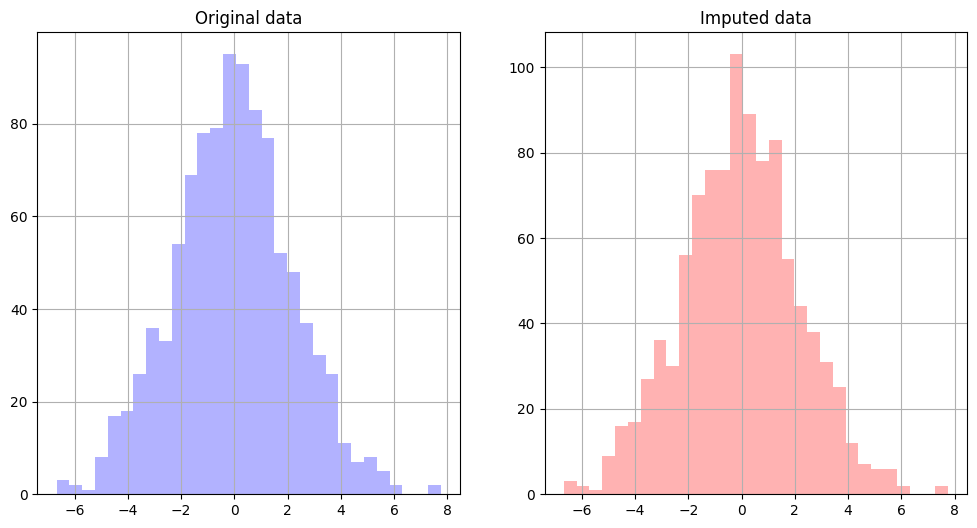

In [ ]:
import matplotlib.pyplot as plt

# Choose a column to visualize
column = 'Column_1'  # Change this to the column you want to visualize

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
df_original[column].hist(ax=ax[0], bins=30, alpha=0.3, color='b', label='Original')
ax[0].set_title('Original data')

# Plot imputed data
df_imputed[column].hist(ax=ax[1], bins=30, alpha=0.3, color='r', label='Imputed')
ax[1].set_title('Imputed data')

plt.show()


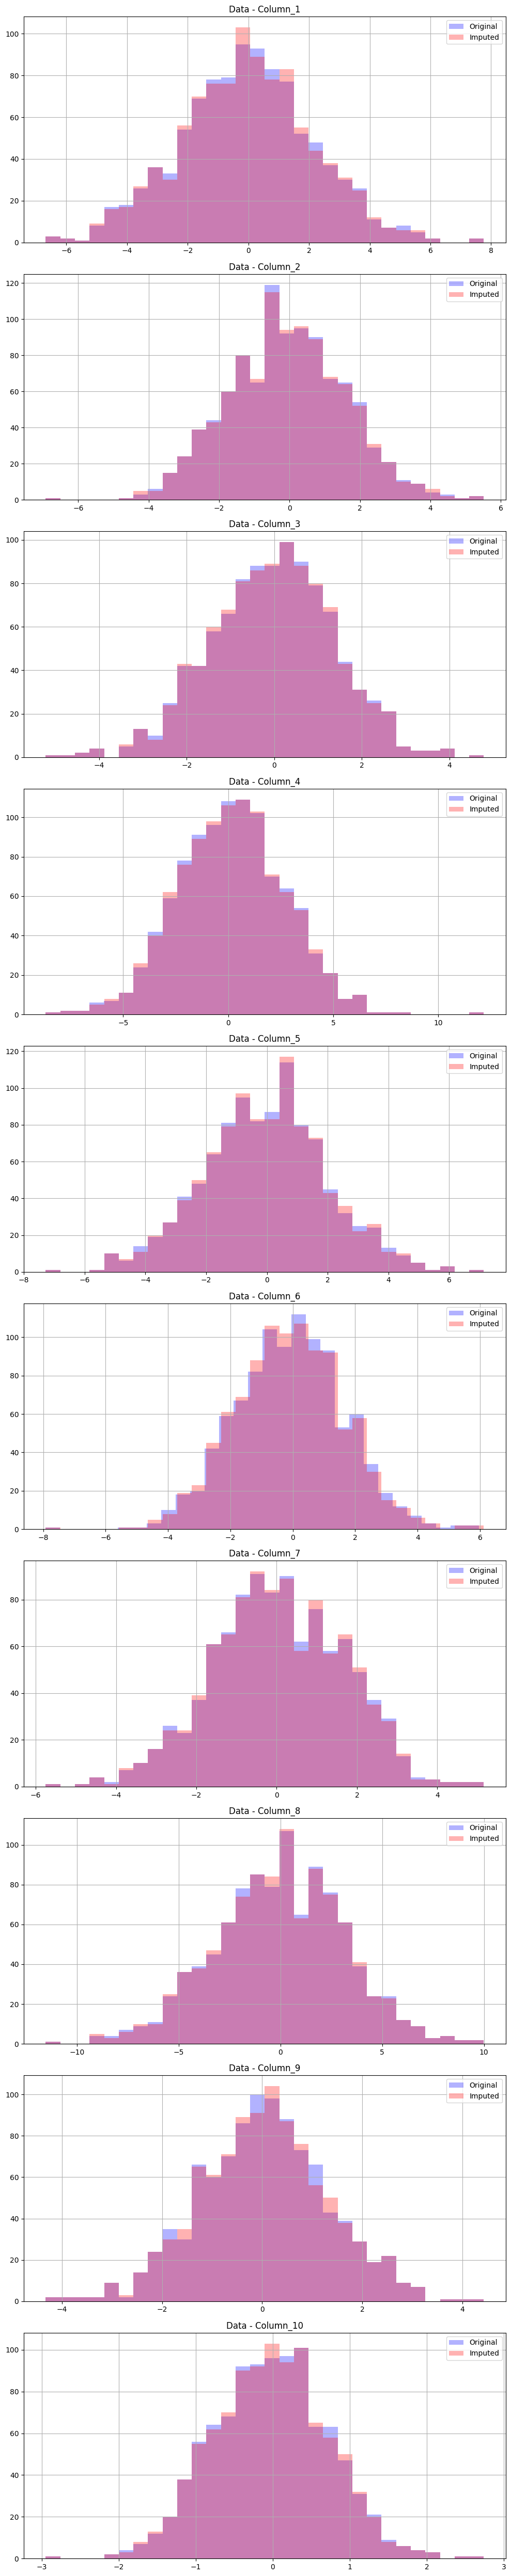

In [ ]:
# Get the number of columns in the DataFrame
num_columns = len(df_original.columns)

# Create subplots with 1 row for each column
fig, axs = plt.subplots(num_columns, figsize=(10, 5*num_columns))

# If there is only one column, axs will not be an array. Make it an array for consistency.
if num_columns == 1:
    axs = [axs]

# Iterate over all columns
for i, column in enumerate(df_original.columns):

    # Plot original data
    df_original[column].hist(ax=axs[i], bins=30, alpha=0.3, color='b', label='Original')

    # Plot imputed data
    df_imputed[column].hist(ax=axs[i], bins=30, alpha=0.3, color='r', label='Imputed')

    # Set the title and legend
    axs[i].set_title(f'Data - {column}')
    axs[i].legend()

# Adjust the layout
plt.tight_layout()
plt.show()


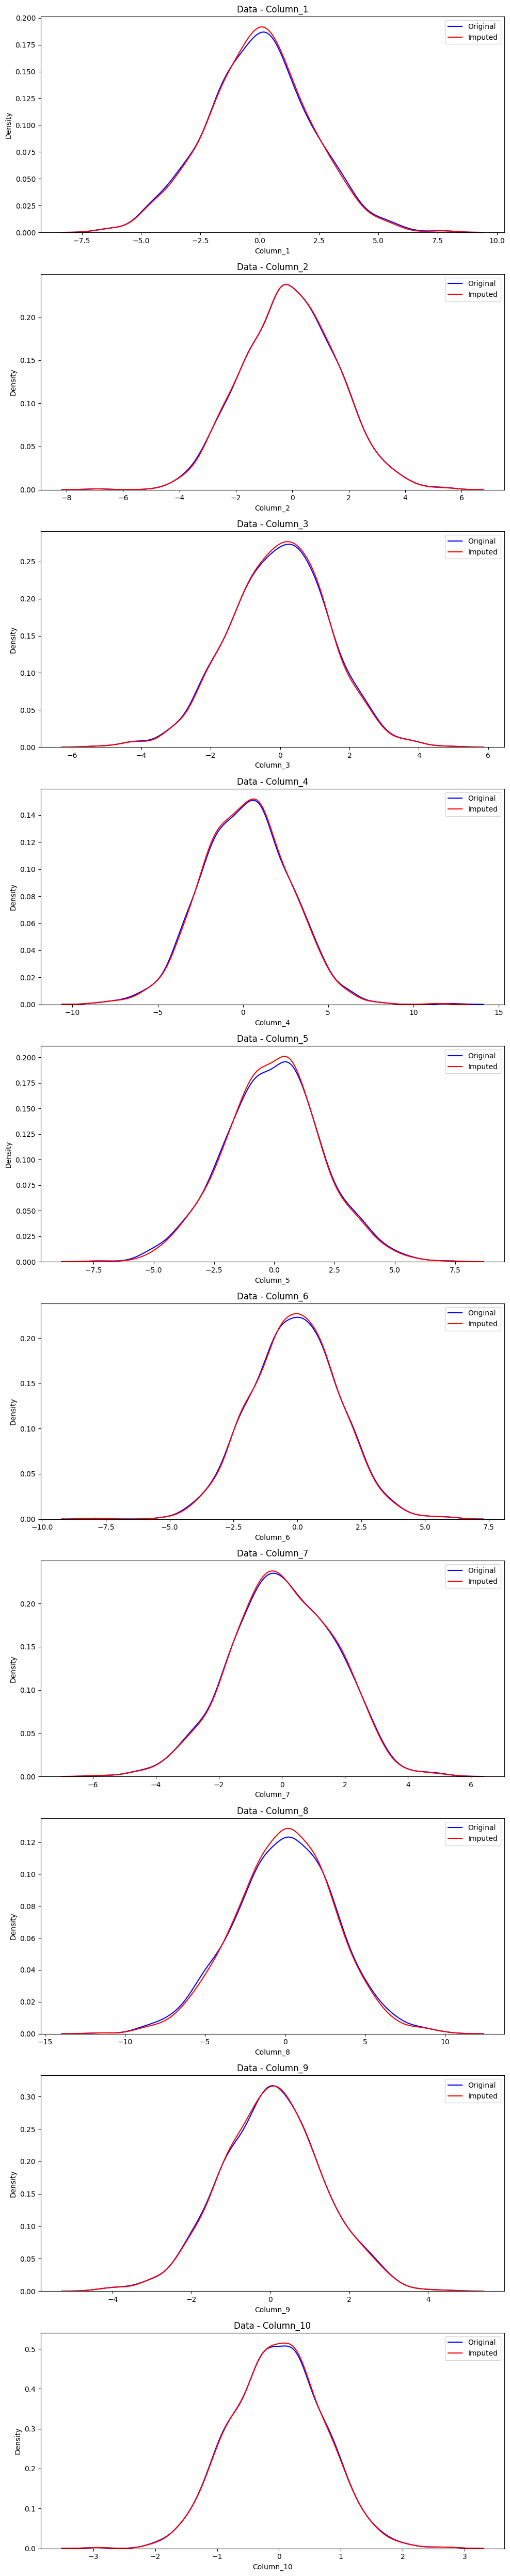

In [ ]:
import seaborn as sns

# Get the number of columns in the DataFrame
num_columns = len(df_original.columns)

# Create subplots with 1 row for each column
fig, axs = plt.subplots(num_columns, figsize=(10, 5*num_columns))

# If there is only one column, axs will not be an array. Make it an array for consistency.
if num_columns == 1:
    axs = [axs]

# Iterate over all columns
for i, column in enumerate(df_original.columns):

    # Plot original data
    sns.kdeplot(data=df_original[column], ax=axs[i], color='b', label='Original')

    # Plot imputed data
    sns.kdeplot(data=df_imputed[column], ax=axs[i], color='r', label='Imputed')

    # Set the title and legend
    axs[i].set_title(f'Data - {column}')
    axs[i].legend()

# Adjust the layout
plt.tight_layout()
plt.show()


In [ ]:
df_combined

,Type,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,Original,-0.406125,-0.976485,-0.248600,1.779952,-0.847973,-1.013877,0.540573,-0.068982,0.173698,-0.308654
1,Original,-3.103727,-1.496691,-0.290863,2.954395,1.493535,-2.391145,1.167330,-1.832236,1.916525,-0.735068
2,Original,-3.785353,-0.194770,-1.476686,1.288761,1.482331,-1.215398,-0.543398,-4.807475,1.482691,-0.376318
3,Original,-1.518960,-0.898786,0.554363,1.081294,1.291761,-0.992677,1.054603,0.265591,1.056458,-0.458068
4,Original,-2.479751,-1.775634,3.092538,1.302630,4.403101,-1.457873,2.773587,4.324757,2.027941,-1.253890
...,...,...,...,...,...,...,...,...,...,...,...
1995,Imputed,1.827003,0.612905,0.442662,-1.454024,-0.555833,0.928166,-0.345230,1.728980,-1.077937,0.433331
1996,Imputed,3.726232,3.408492,-3.147703,-3.983586,-4.748049,3.370021,-3.932545,-4.453019,-2.930490,1.867570
1997,Imputed,-1.409004,-0.271516,-0.277878,0.699109,0.688972,-0.735535,0.061234,-1.265994,0.792552,-0.285508
1998,Imputed,2.226035,0.702583,0.062750,-1.349666,-1.252487,1.120490,-0.705510,1.476768,-1.231124,0.495008


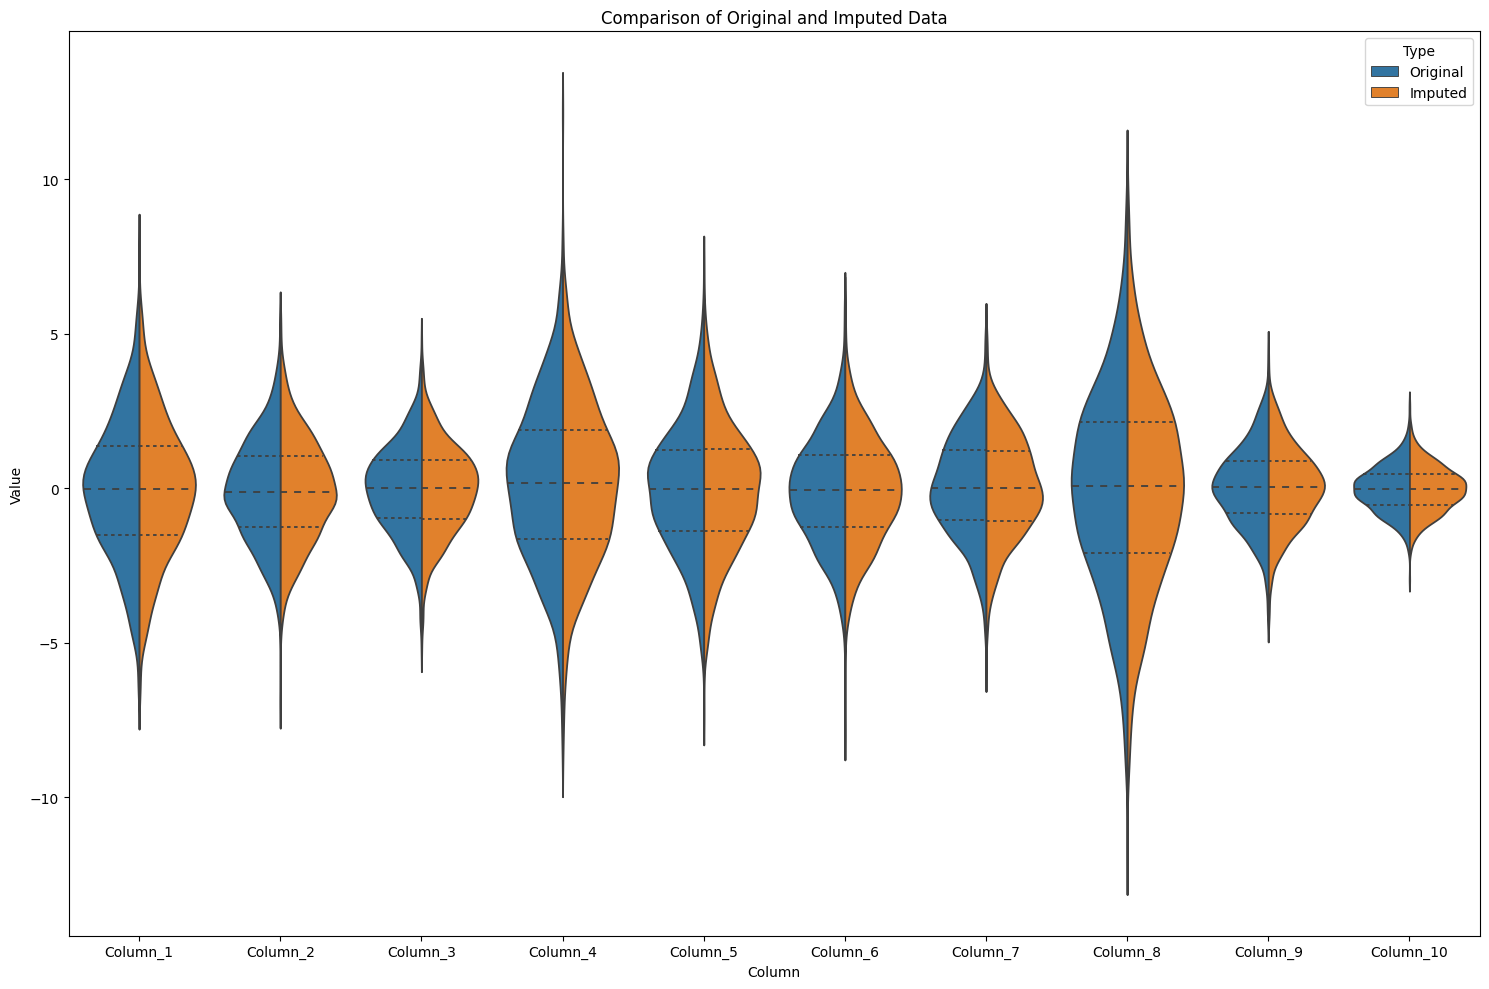

In [ ]:
# Get the number of columns in the DataFrame
num_columns = len(df_original.columns)

# Reshape the data
df_original_melted = df_original.melt(var_name='Column', value_name='Value')
df_original_melted['Type'] = 'Original'

df_imputed_melted = df_imputed.melt(var_name='Column', value_name='Value')
df_imputed_melted['Type'] = 'Imputed'

df_combined_melted = pd.concat([df_original_melted, df_imputed_melted])

# Create the plot
plt.figure(figsize=(15, 10))
sns.violinplot(x='Column', y='Value', hue='Type', data=df_combined_melted, split=True, inner='quart', linewidth=1.3)
plt.title('Comparison of Original and Imputed Data')
plt.tight_layout()
plt.show()
